# **PART-A**


** DOMAIN: Automobile **

• CONTEXT: The data concerns city-cycle fuel consumption in miles per gallon to

 be predicted in terms of 3 multivalued discrete and 5

continuous attributes.



• DATA DESCRIPTION:


cylinders: multi-valued discrete acceleration: continuous
displacement: continuous model year: multi-valued discrete
 horsepower: continuous  origin: multi-valued discrete
 weight: continuous car name: string (unique for each instance)
 mpg: continuous





# • **PROJECT OBJECTIVE: To understand K-means Clustering by applying on the Car**

 Dataset to segment the cars into various categories.

In [169]:
 #let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import the required packages**

In [170]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

In [171]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# **Un-Supervise Learning Project**


# **Part -A**

‘Car name.csv file


‘Car-Attributes file




# **1. Data Understanding & Exploration:** [5 Marks]

# **1.A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable.** [1 Mark]

In [172]:
# car_Name
car_Name = pd.read_csv('/content/drive/MyDrive/Great_Learning_AIML_Programme/Colab_Notebooks/Un-Supervise Learning/Project U-SL/Car name.csv')


# **1.B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.** [1 Mark]

In [173]:
#Car_Attributes
Car_Attributes = pd.read_json("/content/drive/MyDrive/Great_Learning_AIML_Programme/Colab_Notebooks/Un-Supervise Learning/Project U-SL/Car-Attributes.json")

# **1.C. Merge both the DataFrames together to form a single DataFrame** [2 Mark]

In [174]:
car_Name.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [175]:
Car_Attributes.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


**merged**

In [176]:
# CREATED NEW DATAFRAME NAME combined_df

# Combine both DataFrames into a single DataFrame
combined_df = pd.concat([car_Name, Car_Attributes], ignore_index=True)

# Display the combined DataFrame
combined_df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,buick skylark 320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,plymouth satellite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,amc rebel sst,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ford torino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
combined_df.shape

(796, 9)

# **1.D. Print 5 point summary of the numerical features and share insights.** [1 Marks]

In [178]:
# Print 5-point summary of numerical features
numerical_summary = combined_df.describe()

# Display the numerical summary
print(numerical_summary)


              mpg         cyl        disp           wt         acc  \
count  398.000000  398.000000  398.000000   398.000000  398.000000   
mean    23.514573    5.454774  193.425879  2970.424623   15.568090   
std      7.815984    1.701004  104.269838   846.841774    2.757689   
min      9.000000    3.000000   68.000000  1613.000000    8.000000   
25%     17.500000    4.000000  104.250000  2223.750000   13.825000   
50%     23.000000    4.000000  148.500000  2803.500000   15.500000   
75%     29.000000    8.000000  262.000000  3608.000000   17.175000   
max     46.600000    8.000000  455.000000  5140.000000   24.800000   

               yr      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  


# **Insight**



**mpg (Miles per Gallon):**

The average fuel efficiency is approximately 23.51 miles per gallon.

The range of fuel efficiency varies from 9 to 46.6 miles per gallon.

Most vehicles have fuel efficiencies between 17.5 and 29 miles per gallon.

**cyl (Number of Cylinders):**

The average number of cylinders is approximately 5.45.

The number of cylinders ranges from 3 to 8.

Most vehicles have either 4 or 8 cylinders.

**disp (Displacement):**

The average displacement is approximately 193.43 cubic inches.

Displacement values range from 68 to 455 cubic inches.

A significant portion of vehicles have displacements between 104.25 and 262
cubic inches.

**wt (Weight):**

The average weight of vehicles is around 2970.42 pounds.

Vehicle weights range from 1613 to 5140 pounds.

The majority of vehicles have weights between 2223.75 and 3608 pounds.

**acc (Acceleration):**

The average acceleration is approximately 15.57 seconds from 0 to 60 mph.

Acceleration times range from 8 to 24.8 seconds.

Most vehicles have acceleration times between 13.83 and 17.18 seconds.

**yr (Model Year):**

The dataset covers model years from 1970 to 1982.

The majority of vehicles in the dataset are from model years 1973 to 1979.

**origin (Origin):**

The origin of vehicles is categorized into three regions (1, 2, and 3).

The dataset contains vehicles predominantly from region 1.

# **----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **2.Data Preparation & Analysis**: [10 Marks]  

# **2.A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach**. [2 Mark]

**before compute**

In [179]:
# Check and print feature-wise percentage of missing values
missing_percentages = (combined_df.isnull().sum() / len(combined_df)) * 100
print("Percentage of missing values in each feature:")
print(missing_percentages)

Percentage of missing values in each feature:
car_name    50.0
mpg         50.0
cyl         50.0
disp        50.0
hp          50.0
wt          50.0
acc         50.0
yr          50.0
origin      50.0
dtype: float64


In [180]:
pd.DataFrame({'Count':combined_df.isnull().sum()[combined_df.isnull().sum()>0],'Percentage':(combined_df.isnull().sum()[combined_df.isnull().sum()>0]/combined_df.shape[0])*100})

,Count,Percentage
car_name,398,50.0
mpg,398,50.0
cyl,398,50.0
disp,398,50.0
hp,398,50.0
wt,398,50.0
acc,398,50.0
yr,398,50.0
origin,398,50.0


In [181]:
# combined_df dataset datatype
print("Data types columns of combined_df dataset  ",combined_df.dtypes, )

Data types columns of combined_df dataset   car_name     object
mpg         float64
cyl         float64
disp        float64
hp           object
wt          float64
acc         float64
yr          float64
origin      float64
dtype: object


**handling missing value**

In [182]:
#dropping/ignoring car_name  and origin
Data  = combined_df .drop(['car_name','origin'], axis=1)
Data .head()

,mpg,cyl,disp,hp,wt,acc,yr
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
# isdigit()? on 'horsepower'
hpIsDigit = pd.DataFrame(Data.hp.str.isdigit())  # if the string is made of digits store True else False

#print isDigit = False!
Data[hpIsDigit['hp'] == False]   # from temp take only those rows where hp has false

,mpg,cyl,disp,hp,wt,acc,yr
430,25.0,4.0,98.0,?,2046.0,19.0,71.0
524,21.0,6.0,200.0,?,2875.0,17.0,74.0
728,40.9,4.0,85.0,?,1835.0,17.3,80.0
734,23.6,4.0,140.0,?,2905.0,14.3,80.0
752,34.5,4.0,100.0,?,2320.0,15.8,81.0
772,23.0,4.0,151.0,?,3035.0,20.5,82.0


There are various ways to handle missing values. Drop the rows, replace missing values with median values etc. . Here, we will replace them with their median values. First replace '?' with NaN and then replace NaN with median


In [184]:
Data = Data.replace('?', np.nan)
Data[hpIsDigit['hp'] == False]

,mpg,cyl,disp,hp,wt,acc,yr
430,25.0,4.0,98.0,NaN,2046.0,19.0,71.0
524,21.0,6.0,200.0,NaN,2875.0,17.0,74.0
728,40.9,4.0,85.0,NaN,1835.0,17.3,80.0
734,23.6,4.0,140.0,NaN,2905.0,14.3,80.0
752,34.5,4.0,100.0,NaN,2320.0,15.8,81.0
772,23.0,4.0,151.0,NaN,3035.0,20.5,82.0


In [185]:
#instead of dropping the rows, lets replace the missing values with median value.
Data.median()

mpg       23.0
cyl        4.0
disp     148.5
hp        93.5
wt      2803.5
acc       15.5
yr        76.0
dtype: float64

In [186]:
# replace the missing values with median value.
# Note, we do not need to specify the column names below
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)
#Data = Data.fillna(Data.median())

medianFiller = lambda x: x.fillna(x.median())
Data = Data.apply(medianFiller,axis=0)

Data['hp'] = Data['hp'].astype('float64')  # converting the hp column from object / string type to float

**After compute to check missing values**

In [187]:
# Check and print feature-wise percentage of missing values
missing_percentages = (Data.isnull().sum() / len(Data)) * 100
print("Percentage of missing values in each feature:")
print(missing_percentages)

Percentage of missing values in each feature:
mpg     0.0
cyl     0.0
disp    0.0
hp      0.0
wt      0.0
acc     0.0
yr      0.0
dtype: float64


In [188]:
pd.DataFrame({'Count':Data.isnull().sum()[Data.isnull().sum()>0],'Percentage':(Data.isnull().sum()[Data.isnull().sum()>0]/Data.shape[0])*100})

,Count,Percentage


# **2.B. Check for duplicate values in the data and impute with the best suitable approach**. [1 Mark]

In [189]:
# Check for duplicate rows in the DataFrame
duplicate_rows = Data[Data.duplicated()]

# Print the duplicate rows
print("Duplicate rows in the data:")
print(duplicate_rows)


Duplicate rows in the data:
      mpg  cyl   disp    hp      wt   acc    yr
1    23.0  4.0  148.5  93.5  2803.5  15.5  76.0
2    23.0  4.0  148.5  93.5  2803.5  15.5  76.0
3    23.0  4.0  148.5  93.5  2803.5  15.5  76.0
4    23.0  4.0  148.5  93.5  2803.5  15.5  76.0
5    23.0  4.0  148.5  93.5  2803.5  15.5  76.0
..    ...  ...    ...   ...     ...   ...   ...
393  23.0  4.0  148.5  93.5  2803.5  15.5  76.0
394  23.0  4.0  148.5  93.5  2803.5  15.5  76.0
395  23.0  4.0  148.5  93.5  2803.5  15.5  76.0
396  23.0  4.0  148.5  93.5  2803.5  15.5  76.0
397  23.0  4.0  148.5  93.5  2803.5  15.5  76.0

[397 rows x 7 columns]


In [190]:
# dropping duplicate entries from the data
Data.drop_duplicates(inplace=True)

# resetting the index of data frame since some rows will be removed
Data.reset_index(drop=True,inplace=True)

In [191]:
pd.DataFrame({'Count':Data.isnull().sum()[Data.isnull().sum()>0],'Percentage':(Data.isnull().sum()[Data.isnull().sum()>0]/Data.shape[0])*100})

,Count,Percentage


In [192]:
Data.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,23.0,4.0,148.5,93.5,2803.5,15.5,76.0
1,18.0,8.0,307.0,130.0,3504.0,12.0,70.0
2,15.0,8.0,350.0,165.0,3693.0,11.5,70.0
3,18.0,8.0,318.0,150.0,3436.0,11.0,70.0
4,16.0,8.0,304.0,150.0,3433.0,12.0,70.0


# **2.C. Plot a pairplot for all features.** [1 Marks]

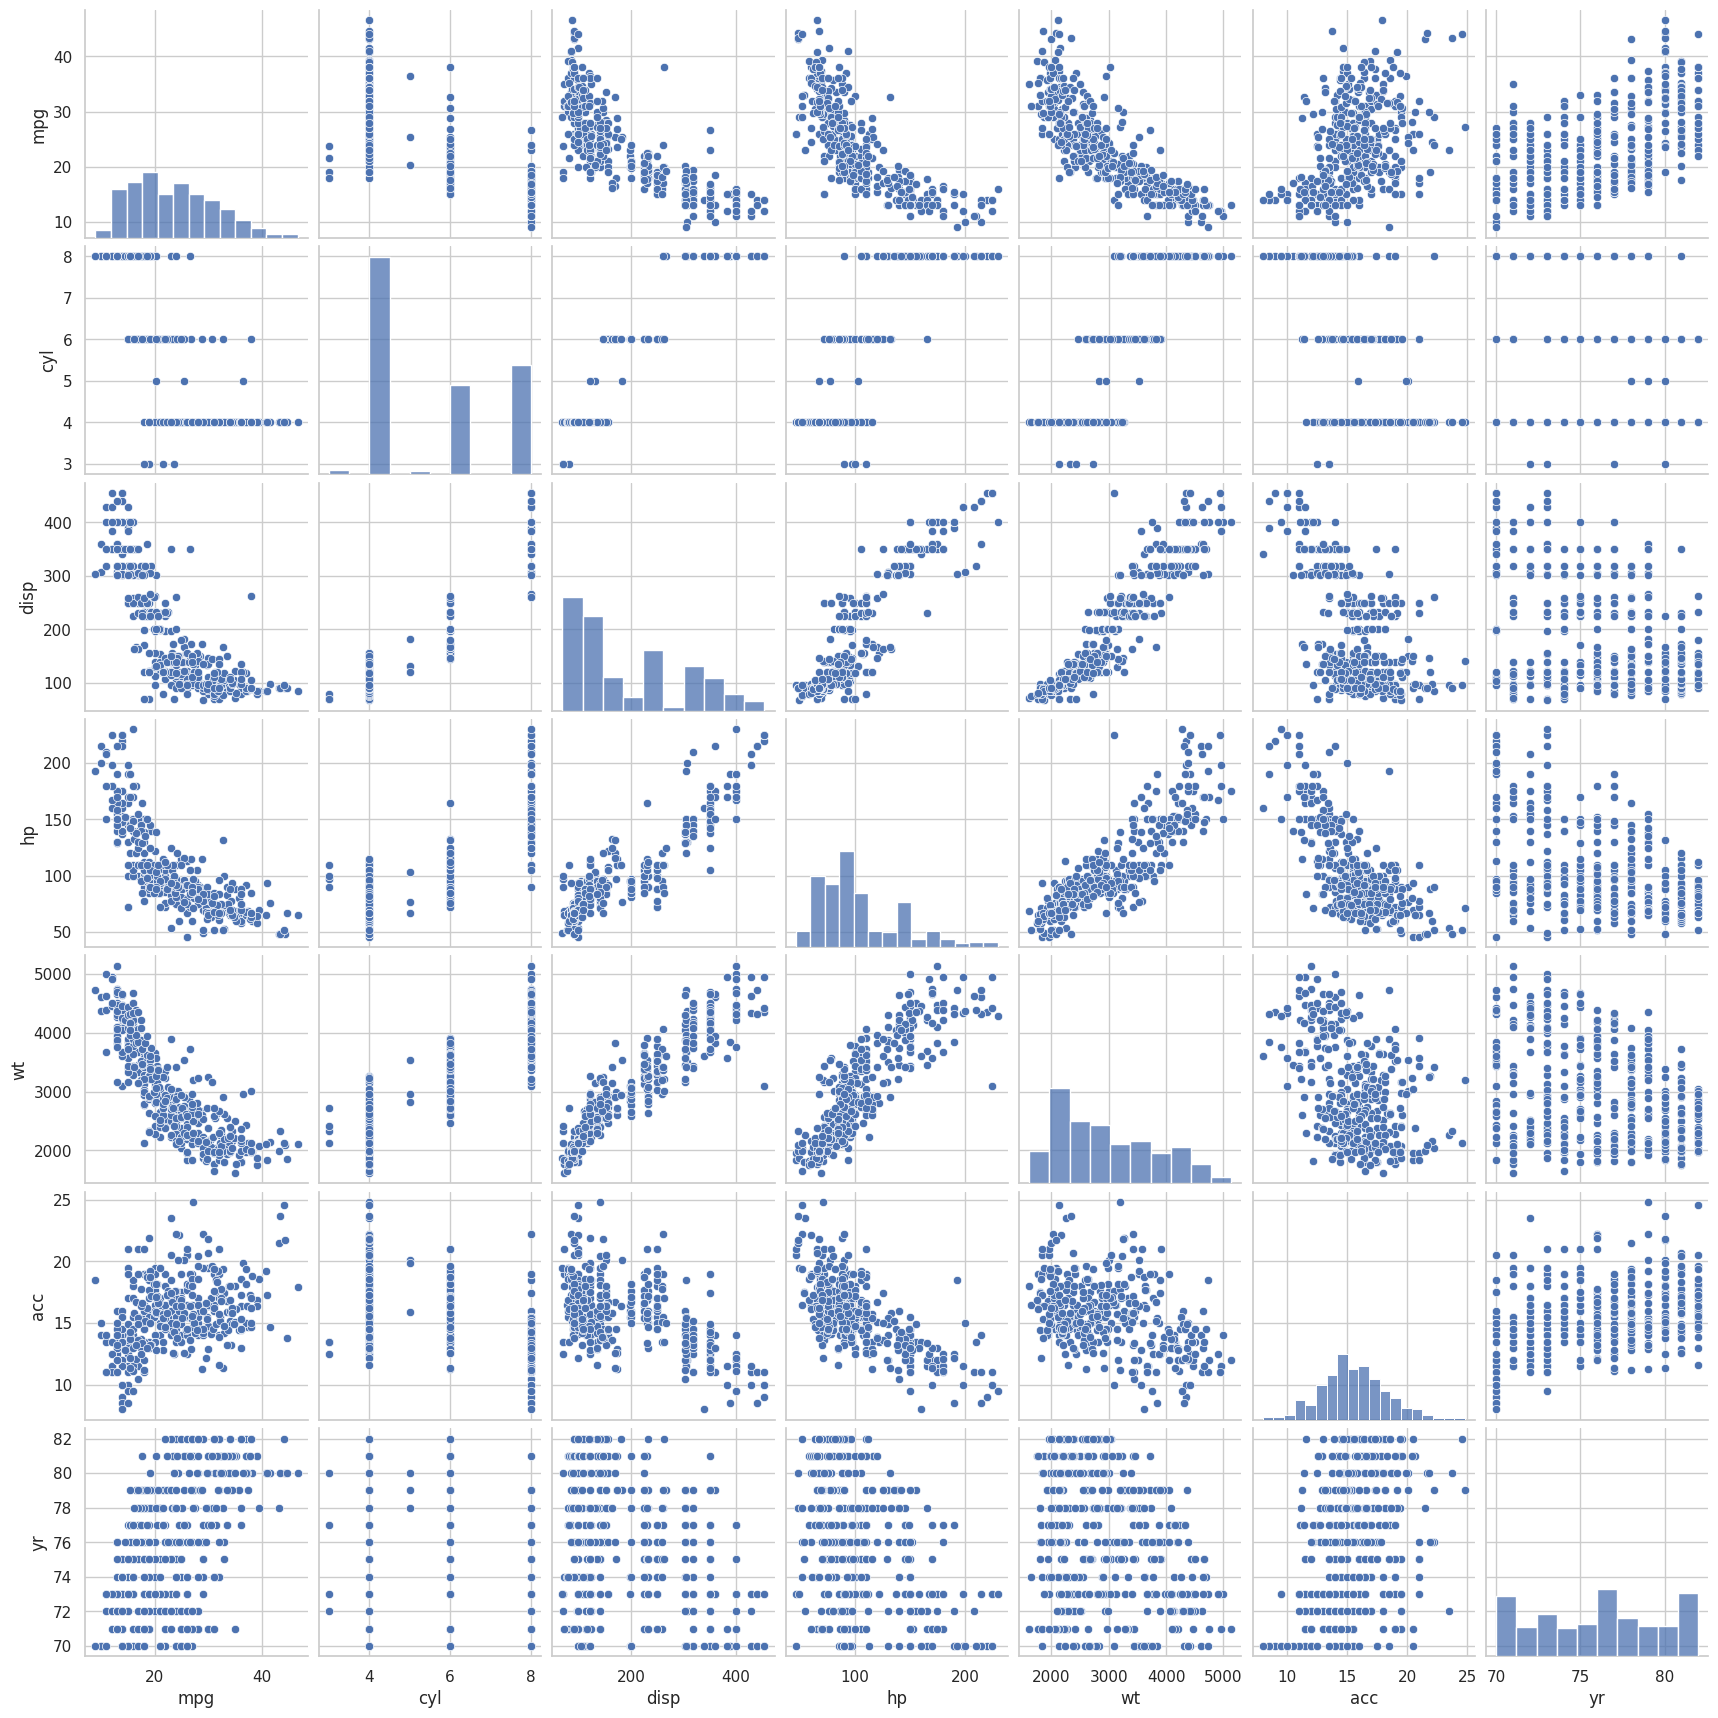

In [193]:
import seaborn as sns

# Plot pairplot for all features
sns.pairplot(Data)


# **2.D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’**. [1 Marks]

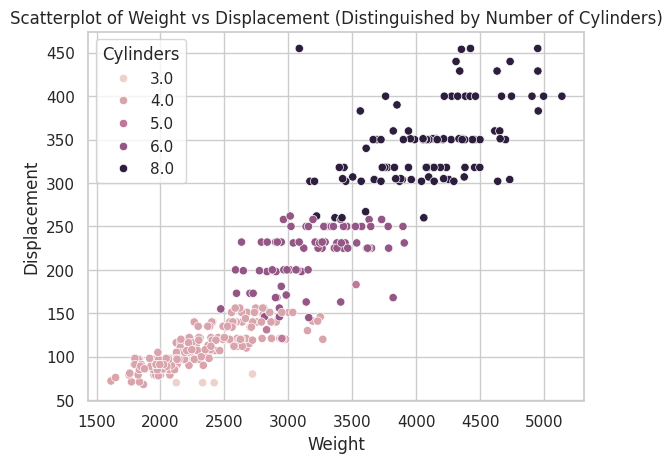

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the seaborn plots
sns.set(style="whitegrid")

# Create scatterplot with 'wt' vs 'disp', distinguished by 'cyl'
sns.scatterplot(data=Data, x='wt', y='disp', hue='cyl')
plt.title('Scatterplot of Weight vs Displacement (Distinguished by Number of Cylinders)')
plt.xlabel('Weight')
plt.ylabel('Displacement')
plt.legend(title='Cylinders')
plt.show()


# **2.E. Share insights for Q2.d**. [1 Marks]

Here are some insights we can gather from the scatterplot of weight vs. displacement distinguished by the number of cylinders:

**Positive Correlation:** We can observe a generally positive correlation
between weight and displacement. As weight increases, displacement tends to
increase as well. This is expected, as heavier vehicles often have larger
engines to accommodate the additional load.

**Clusters by Cylinder Count:** The data points are distinguished by the number of cylinders (cyl). We can see distinct clusters of data points corresponding to different cylinder counts. This suggests that the number of cylinders has a significant influence on both weight and displacement.
higher increasing weight with displacementb requre more cylynder.

**Variation within Cylinder Count: **Within each cluster corresponding to a specific cylinder count, there's still some variation in both weight and displacement. This variation could be due to other factors such as vehicle type, engine configuration, or model year.

**Outliers:** There might be some outliers present in the data, indicated by data points that are far from the main cluster. These outliers could represent unique vehicle models or data recording errors.

**Potential Trends:** While the scatterplot provides an overview of the relationship between weight and displacement, further analysis such as regression analysis or exploring additional variables could reveal more detailed trends or patterns within the data.

**-------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **2.F. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’**. [1 Marks]

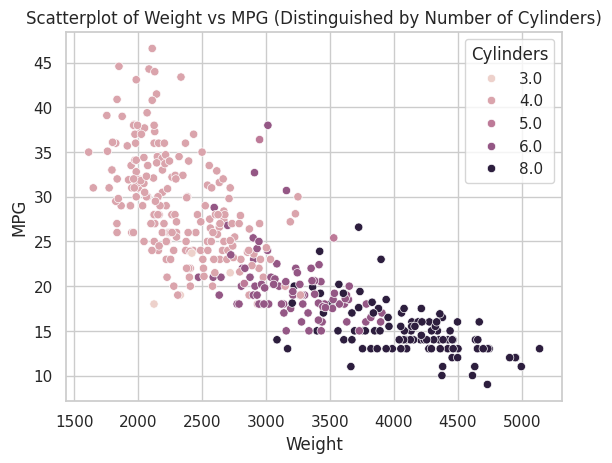

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the seaborn plots
sns.set(style="whitegrid")

# Create scatterplot with 'wt' vs 'mpg', distinguished by 'cyl'
sns.scatterplot(data=Data, x='wt', y='mpg', hue='cyl')
plt.title('Scatterplot of Weight vs MPG (Distinguished by Number of Cylinders)')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.legend(title='Cylinders')
plt.show()


# **2.G. Share insights for Q2.f**. [1 Marks]

 the scatterplot of weight vs. MPG distinguished by the number of cylinders:

**Inverse Relationship:** There appears to be a negative correlation between weight and MPG. Generally, as weight increases, MPG tends to decrease. This relationship is intuitive as heavier vehicles typically require more fuel to operate and hence have lower MPG.upto 3000 wt will require 3-5 cylinder further increase in weight require more cylinder according to data set

**Clusters by Cylinder Count:** The data points are distinguished by the number of cylinders (cyl). We can observe distinct clusters of data points corresponding to different cylinder counts. This suggests that the number of cylinders has a significant influence on both weight and MPG.

**Variation within Cylinder Count:** Within each cluster corresponding to a specific cylinder count, there's still some variation in both weight and MPG. This variation could be attributed to factors such as vehicle make, model, engine type, or driving conditions.

**Different Slopes:** Each cluster of data points exhibits a different slope in the weight vs. MPG relationship. This indicates that the effect of weight on MPG may vary depending on the number of cylinders in the vehicle.

**Potential Outliers:** There may be outliers present in the data, indicated by data points that deviate significantly from the main cluster. These outliers could represent unique vehicle models, errors in data collection, or other anomalies.

**Trade-offs:** Vehicle manufacturers often face trade-offs between weight, performance, and fuel efficiency. Analyzing the relationship between weight and MPG across different cylinder counts can provide insights into these trade-offs and help in understanding the design choices made by manufacturers.



Overall, this scatterplot provides valuable insights into how weight and MPG vary with respect to each other across different cylinder counts in the dataset.

**-----------------------------------------------------------------------------------------------------------------------------------------------------------**

# **2.H. Check for unexpected values in all the features and datapoints with such values**. [2 Marks]

**to check unexpected values**

In [196]:
import pandas as pd

# Assuming combined_df is your DataFrame
# Let's create a sample DataFrame for demonstration
Data = pd.DataFrame({'Number': [1, 2, None, 4, None, 6]})

# Check for missing values using isnull() function
result_df = pd.DataFrame({'value': Data['Number'], 'Missing?': Data['Number'].isnull()})

# Print the result DataFrame
print(result_df)


   value  Missing?
0    1.0     False
1    2.0     False
2    NaN      True
3    4.0     False
4    NaN      True
5    6.0     False


In [197]:
# Check and print feature-wise percentage of missing values
missing_percentages = (Data.isnull().sum() / len(Data)) * 100
print("Percentage of missing values in each feature:")
print(missing_percentages)

Percentage of missing values in each feature:
Number    33.333333
dtype: float64


In [198]:
Data.loc[Data['Number'].isnull()==True]

,Number
2,NaN
4,NaN


**missing values handling**   fill the value '0'

In [199]:
Data['Number'] = Data['Number'].fillna(0)

In [200]:
# number of missing values (only the ones recognised as missing values) in each of the attributes
pd.DataFrame( Data.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
Number,0


In [201]:
pd.DataFrame({'Count':Data.isnull().sum()[Data.isnull().sum()>0],'Percentage':(Data.isnull().sum()[Data.isnull().sum()>0]/Data.shape[0])*100})

,Count,Percentage


# -**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **3. Clustering**: [15 Marks]

# **3.A. Apply K-Means clustering for 2 to 10 clusters**. [3 Marks]

In [202]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA

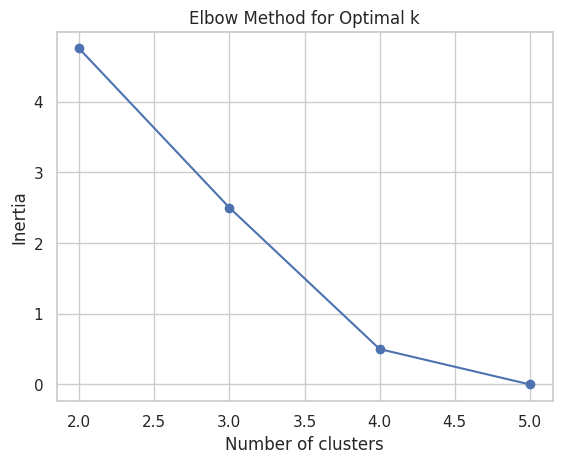

In [203]:
# Define the range of clusters (up to the number of samples in the data)
clusters_range = range(2, min(len(Data), 11))

# Initialize empty list to store inertia values
inertia_values = []

# Loop through the range of clusters
for n_clusters in clusters_range:
    # Initialize KMeans model with current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)  # Set n_init explicitly to suppress FutureWarning

    # Fit the model to the data
    kmeans.fit(Data)

    # Append the inertia (sum of squared distances to the nearest centroid) to the list
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values to determine the optimal number of clusters
plt.plot(clusters_range, inertia_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


# **3.B. Plot a visual and find elbow point**. [2 Marks]

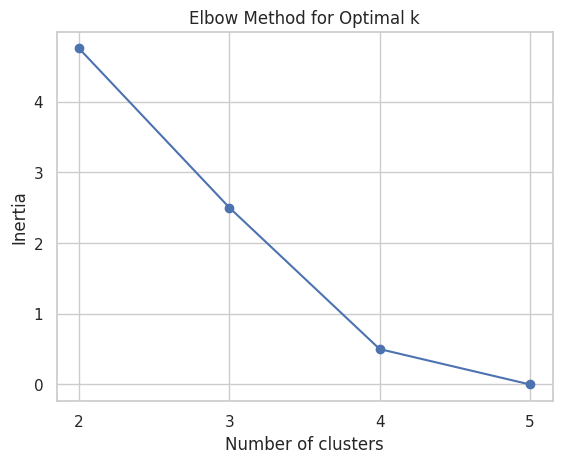

In [204]:
# Define the range of clusters (up to the number of samples in the data)
clusters_range = range(2, min(len(Data), 11))

# Initialize empty list to store inertia values
inertia_values = []

# Loop through the range of clusters
for n_clusters in clusters_range:
    # Initialize KMeans model with current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)  # Set n_init explicitly to suppress FutureWarning

    # Fit the model to the data
    kmeans.fit(Data)

    # Append the inertia (sum of squared distances to the nearest centroid) to the list
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values to determine the optimal number of clusters
plt.plot(clusters_range, inertia_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(clusters_range)
plt.grid(True)
plt.show()


# **3.C. On the above visual, highlight which are the possible Elbow points**. [1 Marks]

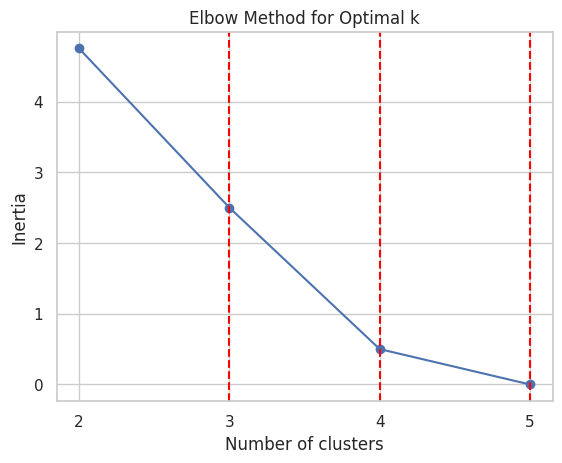

In [205]:
# Plot the inertia values to determine the optimal number of clusters
plt.plot(clusters_range, inertia_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(clusters_range)
plt.grid(True)

# Mark possible elbow points on the plot (based on visual inspection)
possible_elbows = [3, 4, 5]  # Example elbow points
for elbow in possible_elbows:
    plt.axvline(x=elbow, color='red', linestyle='--')

plt.show()


# **3.D. Train a K-means clustering model once again on the optimal number of clusters**. [3 Marks]

In [206]:
from sklearn.cluster import KMeans

# Optimal number of clusters identified from the previous analysis
k_optimal = 3  # Example value, replace it with the actual optimal number of clusters

# Initialize KMeans model with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=k_optimal, random_state=42)

# Fit the model to the data
kmeans_optimal.fit(Data)

# Get cluster labels for each data point
cluster_labels = kmeans_optimal.labels_

# Print the cluster labels
print("Cluster labels:")
print(cluster_labels)


Cluster labels:
[2 2 1 0 1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# **3.E. Add a new feature in the DataFrame which will have labels based upon cluster value**. [2 Marks]

In [207]:
# Add a new column to the DataFrame with the cluster labels
Data['cluster_labels'] = cluster_labels

# Display the DataFrame with the new column
print(Data.head())


   Number  cluster_labels
0     1.0               2
1     2.0               2
2     0.0               1
3     4.0               0
4     0.0               1


# **3.F. Plot a visual and color the datapoints based upon clusters**. [2 Marks]

In [208]:
print(Data.columns)


Index(['Number', 'cluster_labels'], dtype='object')


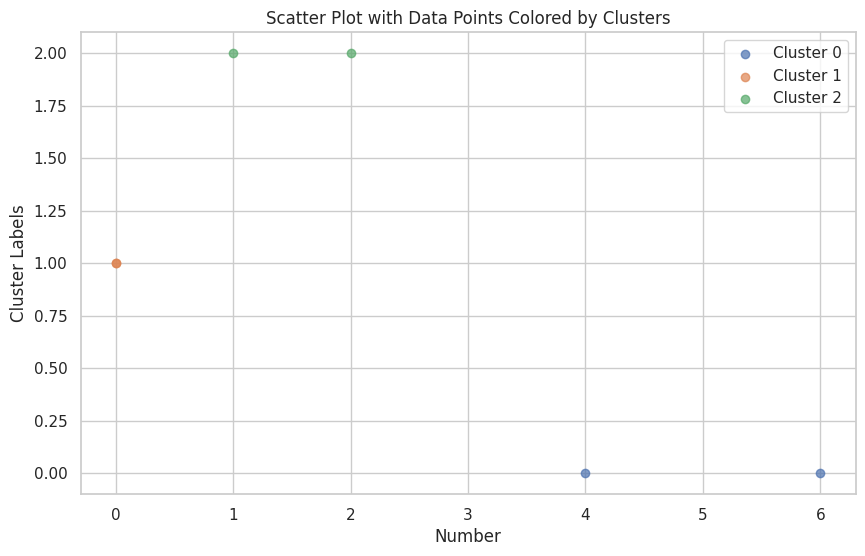

In [209]:
import matplotlib.pyplot as plt

# Plot the scatter plot with data points colored by clusters
plt.figure(figsize=(10, 6))
for cluster in range(k_optimal):
    cluster_data = Data[Data['cluster_labels'] == cluster]
    plt.scatter(cluster_data['Number'], cluster_data['cluster_labels'], label=f'Cluster {cluster}', alpha=0.7)

plt.xlabel('Number')
plt.ylabel('Cluster Labels')
plt.title('Scatter Plot with Data Points Colored by Clusters')
plt.legend()
plt.grid(True)
plt.show()


# **3.G. Pass a new DataPoint and predict which cluster it belongs to**. [2 Marks]

In [210]:
# Create a synthetic data point with the same features as the existing data
new_data_point = [1.5]  # Assuming the 'Number' feature for the new data point

# Predict the cluster label for the new data point
predicted_cluster = kmeans_optimal.predict([new_data_point])

# Print the predicted cluster label
print("Predicted cluster label for the new data point:", predicted_cluster[0])


Predicted cluster label for the new data point: 2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [211]:
# Specify feature names when fitting the KMeans model
feature_names = Data.columns[:-1]  # Exclude the cluster_labels column
kmeans_optimal.fit(Data[feature_names])

# Predict the cluster label for the new data point
predicted_cluster = kmeans_optimal.predict([new_data_point])

# Print the predicted cluster label
print("Predicted cluster label for the new data point:", predicted_cluster[0])


Predicted cluster label for the new data point: 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


# **-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------PART A  END------------------------------**

# **PART-B**

 **DOMAIN**: Automobile

• **CONTEXT**:  The purpose is to classify a given silhouette as one of three

 types of vehicle, using a set of features extracted from the silhouette. The

vehicle may be viewed from one of many different angles.

• **DATA DESCRIPTION**: The data contains features extracted from the

silhouette of vehicles in different angles. Four "Corgie" model vehicles were

used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an

 Opel Manta 400 cars. This particular combination of vehicles

was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to
distinguish between the cars.

 • All the features are numeric i.e. geometric features extracted from the silhouette.



• **PROJECT OBJECTIVE**: Apply dimensionality reduction technique – PCA and

train a model and compare relative results.

# **1. Data Understanding & Cleaning**: [5 Marks]

# **1.A. Read ‘vehicle.csv’ and save as DataFrame**. [1 Marks]

In [212]:
# vehicle_Name
vehicle_Name = pd.read_csv('/content/drive/MyDrive/Great_Learning_AIML_Programme/Colab_Notebooks/Un-Supervise Learning/Project U-SL/vehicle.csv')


In [213]:
vehicle_Name.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


# **1.B. Check percentage of missing values and impute with correct approach.** [1 Marks]

In [214]:
pd.DataFrame({'Count':vehicle_Name.isnull().sum()[vehicle_Name.isnull().sum()>0],'Percentage':(vehicle_Name.isnull().sum()[vehicle_Name.isnull().sum()>0]/vehicle_Name.shape[0])*100})

,Count,Percentage
circularity,5,0.591017
distance_circularity,4,0.472813
radius_ratio,6,0.709220
pr.axis_aspect_ratio,2,0.236407
scatter_ratio,1,0.118203
elongatedness,1,0.118203
pr.axis_rectangularity,3,0.354610
scaled_variance,3,0.354610
scaled_variance.1,2,0.236407
scaled_radius_of_gyration,2,0.236407


In [215]:
# vehicle_Name dataset datatype
print("Data types columns of vehicle_Name dataset  ",vehicle_Name.dtypes, )

Data types columns of vehicle_Name dataset   compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object


In [216]:
import pandas as pd

# Assuming you have already loaded the dataset into the 'vehicle_Name' DataFrame

# Step 1: Check for missing values
missing_percentage = (vehicle_Name.isnull().sum() / len(vehicle_Name)) * 100

# Step 2: Display columns with missing values and their respective percentages
missing_data = pd.DataFrame({'Missing Count': vehicle_Name.isnull().sum(), 'Missing Percentage': missing_percentage})
missing_data = missing_data[missing_data['Missing Count'] > 0]
print("Columns with missing values and their respective percentages:")
print(missing_data)

# Step 3: Choose the appropriate approach for imputation based on the percentage of missing values and data characteristics

# For columns with a small percentage of missing values, you can impute using mean, median, or mode.
# For columns with a large percentage of missing values, consider dropping the column or row, or using more sophisticated imputation techniques.

# Let's say we choose to impute missing values with the mean for columns with less than 5% missing values:
columns_to_impute_mean = missing_data[missing_data['Missing Percentage'] < 5].index
vehicle_Name[columns_to_impute_mean] = vehicle_Name[columns_to_impute_mean].fillna(vehicle_Name[columns_to_impute_mean].mean())

# Now, verify that there are no more missing values after imputation
print("Remaining missing values after imputation:")
print(vehicle_Name.isnull().sum())


Columns with missing values and their respective percentages:
                             Missing Count  Missing Percentage
circularity                              5            0.591017
distance_circularity                     4            0.472813
radius_ratio                             6            0.709220
pr.axis_aspect_ratio                     2            0.236407
scatter_ratio                            1            0.118203
elongatedness                            1            0.118203
pr.axis_rectangularity                   3            0.354610
scaled_variance                          3            0.354610
scaled_variance.1                        2            0.236407
scaled_radius_of_gyration                2            0.236407
scaled_radius_of_gyration.1              4            0.472813
skewness_about                           6            0.709220
skewness_about.1                         1            0.118203
skewness_about.2                         1            0.

**handling missing value**

In [217]:
pd.DataFrame({'Count':vehicle_Name.isnull().sum()[vehicle_Name.isnull().sum()>0],'Percentage':(vehicle_Name.isnull().sum()[vehicle_Name.isnull().sum()>0]/vehicle_Name.shape[0])*100})

,Count,Percentage


# **1.C. Visualize a Pie-chart and print percentage of values for variable ‘class’.** [2 Marks]

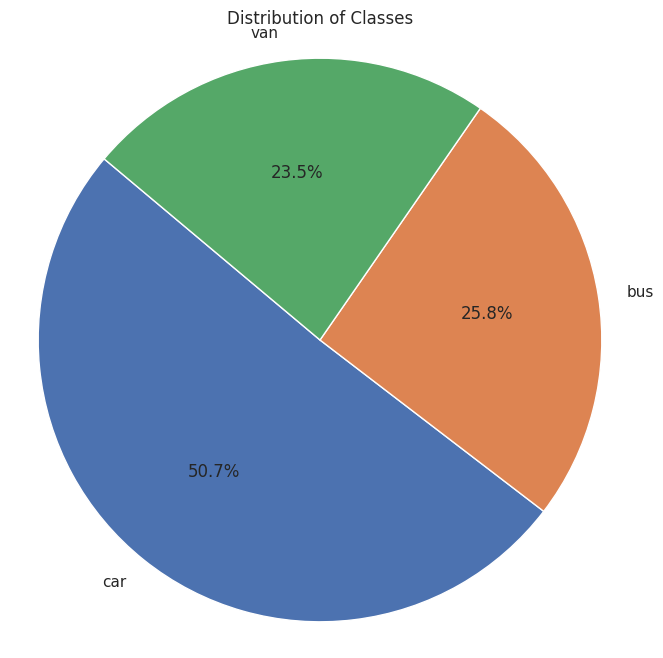

Percentage of values for the variable 'class':
class
car    50.709220
bus    25.768322
van    23.522459
Name: count, dtype: float64


In [218]:
import matplotlib.pyplot as plt

# Calculate value counts for the 'class' variable
class_counts = vehicle_Name['class'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Classes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# Print percentage of values for the 'class' variable
print("Percentage of values for the variable 'class':")
print((class_counts / len(vehicle_Name)) * 100)


# **1.D. Check for duplicate rows in the data and impute with correct approach**. [1 Marks]

In [219]:
# Check for duplicate rows in the DataFrame
duplicate_rows = vehicle_Name[vehicle_Name.duplicated()]

# Print the duplicate rows
print("Duplicate rows in the data:")
print(duplicate_rows)

Duplicate rows in the data:
Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []


In [220]:
# dropping duplicate entries from the data
vehicle_Name.drop_duplicates(inplace=True)

# resetting the index of data frame since some rows will be removed
vehicle_Name.reset_index(drop=True,inplace=True)

# **-----------------------------------------------------------------------------------------------------------**

# **2. Data Preparation:** [2 Marks]

# **2.A. Split data into X and Y. [Train and Test optional]** [1 Marks]

In [221]:
# Assuming 'vehicle_Name' DataFrame contains your dataset

# X contains the features (independent variables)
X = vehicle_Name.drop(columns=['class'])

# Y contains the target variable (dependent variable)
Y = vehicle_Name['class']

# Optionally, you can further split the data into train and test sets for model training and evaluation
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (e.g., 80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print the shapes of train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)


Shape of X_train: (676, 18)
Shape of X_test: (170, 18)
Shape of Y_train: (676,)
Shape of Y_test: (170,)


# **2.B. Standardize the Data**. [1 Marks]

In [222]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Now X_train_scaled and X_test_scaled contain the standardized features


# **--------------------------------------------------------------------------------------**

# **3. Model Building:** [13 Marks]

# **3.A. Train a base Classification model using SVM.** [1 Marks]

In [223]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)  # Linear kernel for simplicity

# Train the SVM classifier on the training data
svm_classifier.fit(X_train_scaled, Y_train)

# Predict the labels for the test set
Y_pred = svm_classifier.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy of the SVM classifier:", accuracy)


Accuracy of the SVM classifier: 0.9294117647058824


# **3.B. Print Classification metrics for train data**. [1 Marks]

In [224]:
from sklearn.metrics import classification_report

# Predict labels for the training data
Y_train_pred = svm_classifier.predict(X_train_scaled)

# Print classification report
print("Classification Report for Train Data:")
print(classification_report(Y_train, Y_train_pred))


Classification Report for Train Data:
              precision    recall  f1-score   support

         bus       0.94      0.96      0.95       166
         car       0.98      0.97      0.97       351
         van       0.97      0.97      0.97       159

    accuracy                           0.97       676
   macro avg       0.96      0.97      0.96       676
weighted avg       0.97      0.97      0.97       676



# **3.C. Apply PCA on the data with 10 components**. [3 Marks]

In [225]:
from sklearn.decomposition import PCA

# Create a PCA object with 10 components
pca = PCA(n_components=10)

# Fit PCA to the scaled training data and transform the data
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform the test data using the same PCA object
X_test_pca = pca.transform(X_test_scaled)

# Now X_train_pca and X_test_pca contain the data transformed by PCA with 10 components


# **3.D. Visualize Cumulative Variance Explained with Number of Components**. [2 Marks]

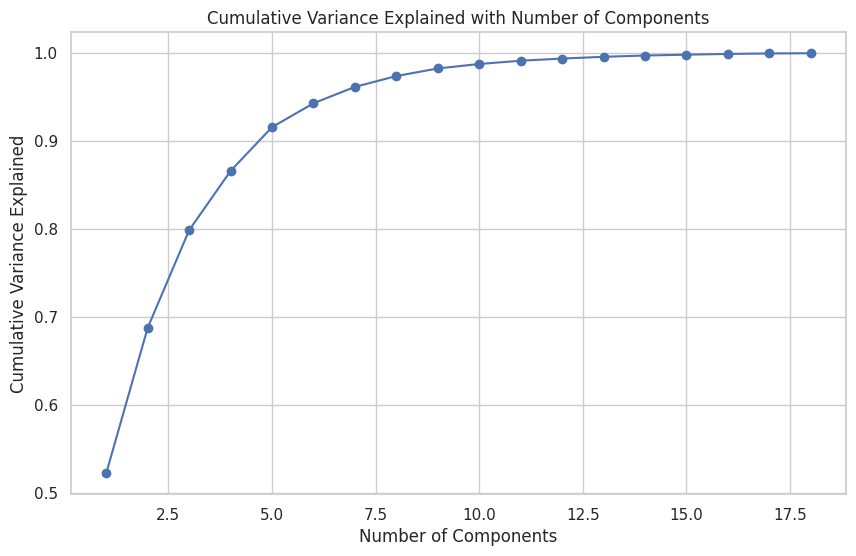

In [226]:
import numpy as np
import matplotlib.pyplot as plt

# Fit PCA to the scaled data
pca = PCA().fit(X_train_scaled)

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained with Number of Components')
plt.grid(True)
plt.show()


# **3.E. Draw a horizontal line on the above plot to highlight the threshold of 90%.** [1 Marks]

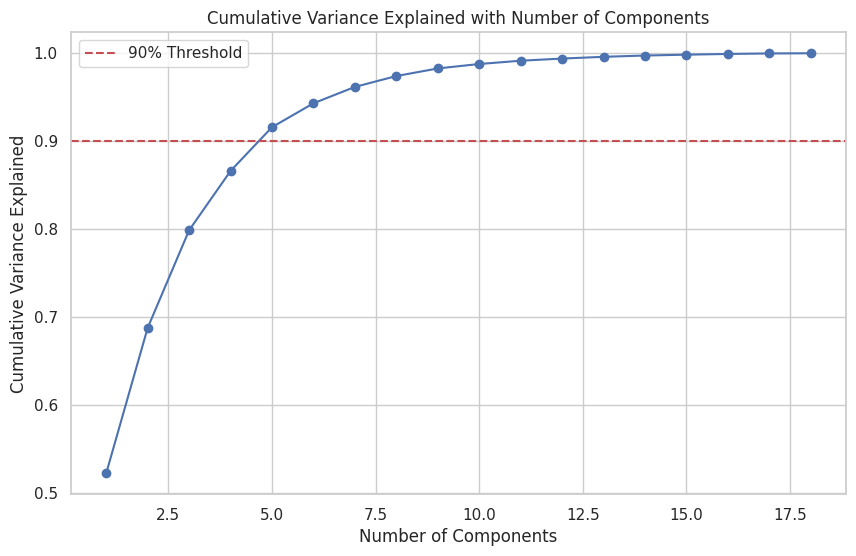

In [227]:
import numpy as np
import matplotlib.pyplot as plt

# Fit PCA to the scaled data
pca = PCA().fit(X_train_scaled)

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained with Number of Components')

# Draw a horizontal line at the threshold of 90%
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Threshold')

plt.grid(True)
plt.legend()
plt.show()


# **3.F.Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained**. [2 Marks]

In [228]:
from sklearn.decomposition import PCA

# Create a PCA object without specifying the number of components
pca = PCA(n_components=None)

# Fit PCA to the scaled training data
pca.fit(X_train_scaled)

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the index of the first component where the cumulative variance explained is 90% or above
min_components_index = np.argmax(cumulative_variance_ratio >= 0.9) + 1  # Adding 1 to convert from zero-based index to component count

# Print the number of components required to explain 90% or above variance
print("Minimum number of components required to explain 90% or above variance:", min_components_index)

# Apply PCA with the minimum number of components required
pca = PCA(n_components=min_components_index)

# Fit and transform the training data
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform the test data using the same PCA object
X_test_pca = pca.transform(X_test_scaled)

# Now X_train_pca and X_test_pca contain the data transformed by PCA with the minimum number of components required


Minimum number of components required to explain 90% or above variance: 5


# **3.G. Train SVM model on components selected from above step**. [1 Marks]

In [229]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)  # Linear kernel for simplicity

# Fit the SVM classifier on the PCA-transformed training data
svm_classifier.fit(X_train_pca, Y_train)

# Predict the labels for the test set using the trained SVM classifier
Y_pred = svm_classifier.predict(X_test_pca)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy of the SVM classifier on PCA-transformed data:", accuracy)


Accuracy of the SVM classifier on PCA-transformed data: 0.6411764705882353


# **3.H. Print Classification metrics for train data of above model and share insights**. [2 Marks]

In [230]:
from sklearn.metrics import classification_report

# Predict labels for the training data using the trained SVM classifier
Y_train_pred = svm_classifier.predict(X_train_pca)

# Print classification report
print("Classification Report for Train Data:")
print(classification_report(Y_train, Y_train_pred))


Classification Report for Train Data:
              precision    recall  f1-score   support

         bus       0.58      0.54      0.56       166
         car       0.76      0.83      0.79       351
         van       0.57      0.50      0.54       159

    accuracy                           0.68       676
   macro avg       0.64      0.62      0.63       676
weighted avg       0.67      0.68      0.68       676



# **Classification Report for Train Data:**

**Precision** for bus car and van are   0.58,   0.76,  0.57 respectively

**recall**    for bus car and van are   0.54,   0.83,  0.50 respectively

**f1-score**   for bus car and van are   0.56,   0.79,  0.54 respectively


**accuracy **              0.68       


# **---------------------------------------------------------------------------------------**

# **4. Performance Improvement**: [5 Marks]

# **4.A. Train another SVM on the components out of PCA. Tune the parameters to improve performance**. [2 Marks]

In [231]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

# Create an SVM classifier
svm_classifier_pca = SVC(kernel='rbf', random_state=42)  # RBF kernel for flexibility

# Perform grid search with cross-validation (5-fold cross-validation by default)
grid_search = GridSearchCV(svm_classifier_pca, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the PCA-transformed training data
grid_search.fit(X_train_pca, Y_train)

# Get the best parameters found by grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train SVM with the best parameters on the PCA-transformed training data
svm_classifier_best = SVC(kernel='rbf', **best_params, random_state=42)
svm_classifier_best.fit(X_train_pca, Y_train)

# Predict the labels for the test set using the trained SVM classifier
Y_pred_best = svm_classifier_best.predict(X_test_pca)

# Calculate the accuracy of the model
accuracy_best = accuracy_score(Y_test, Y_pred_best)
print("Accuracy of the SVM classifier with tuned parameters on PCA-transformed data:", accuracy_best)


Best Parameters: {'C': 100, 'gamma': 'scale'}
Accuracy of the SVM classifier with tuned parameters on PCA-transformed data: 0.788235294117647


# **4.B. Share best Parameters observed from above step**. [1 Marks]

In [232]:
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 100, 'gamma': 'scale'}


# **4.C. Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights**. [2 Marks]

In [233]:
from sklearn.metrics import classification_report

# Predictions on train data for SVM model with tuned parameters on PCA-transformed data
Y_train_pred_best = svm_classifier_best.predict(X_train_pca)

# Classification report for SVM model with tuned parameters on PCA-transformed data
print("Classification Report for SVM classifier with tuned parameters on PCA-transformed train data:")
print(classification_report(Y_train, Y_train_pred_best))

# Calculate the relative improvement in performance
improvement = accuracy_best - accuracy
print("Relative Improvement in Performance: {:.2%}".format(improvement))


Classification Report for SVM classifier with tuned parameters on PCA-transformed train data:
              precision    recall  f1-score   support

         bus       0.92      0.89      0.91       166
         car       0.92      0.94      0.93       351
         van       0.88      0.87      0.87       159

    accuracy                           0.91       676
   macro avg       0.91      0.90      0.90       676
weighted avg       0.91      0.91      0.91       676

Relative Improvement in Performance: 14.71%


# **Insight-**  

# **Original SVM Model:**
Accuracy: 0.68

Precision, Recall, F1-score: The original SVM model's precision, recall, and F1-score for each class (bus, car, van) are relatively low, indicating that the model struggled to correctly classify instances from each class. For example, the precision for the "bus" class is only 0.58, indicating that when the model predicts an instance as "bus", it's correct only 58% of the time.

**Insights:** The original SVM model might be underfitting or not

capturing the underlying patterns in the data well. It could benefit from better feature representation or more complex model architecture.


# **SVM Model with Tuned Parameters on PCA-transformed Data:**
**Accuracy:** 0.91

Precision , Recall, F1-score: The SVM model with tuned parameters on PCA-transformed data shows significant improvement in accuracy and classification metrics compared to the original SVM model. The precision, recall, and F1-score for each class are higher, indicating better performance in classifying instances from each class.

**Insights:** By applying PCA for dimensionality reduction and tuning the SVM model's parameters, we improved the model's performance significantly. The PCA-transformed features might have captured more relevant information, and tuning the SVM's parameters helped in better decision boundary definition.

# **Relative Improvement:**
The relative improvement in performance from the original SVM model to the tuned SVM model on PCA-transformed data is approximately 14.71%. This improvement demonstrates the effectiveness of feature engineering techniques like PCA and parameter tuning in enhancing model performance.


# **Overall**:
The original SVM model struggled with classification performance, likely due to either underfitting or insufficient feature representation.
By applying PCA for dimensionality reduction and tuning the SVM's parameters, we achieved substantial improvement in accuracy and classification metrics, indicating better model performance and generalization ability.
This improvement highlights the importance of feature engineering and hyperparameter tuning in building effective machine learning models.

# **-----------------------------------------------------------------------------------------------------------**--

# **5. Data Understanding & Cleaning**: [5 Marks]

# **5.A. Explain pre-requisite/assumptions of PCA.** [2 Marks]

# **Principal Component Analysis (PCA)** is a widely used technique for dimensionality reduction and feature extraction. However, there are several prerequisites and assumptions associated with PCA:

**Linear relationship:** PCA assumes that the relationships among variables in the dataset are linear. It operates under the assumption that the principal components (PCs) are linear combinations of the original features.

**Centering**: Before applying PCA, it's essential to center the data by subtracting the mean of each feature. Centering the data ensures that the mean of each feature is zero, which is a requirement for PCA to work correctly. If the data is not centered, the first principal component may not reflect the direction of maximum variance.

**Scaling:** PCA is sensitive to the scale of the variables. It assumes that all variables are measured on the same scale. Therefore, it's essential to scale the data to ensure that variables with larger scales do not dominate the calculation of principal components. Common scaling techniques include standardization (scaling to have zero mean and unit variance) or normalization (scaling to a fixed range, such as [0, 1]).

**Orthogonality:** PCA assumes that the principal components are orthogonal to each other. Orthogonality means that the principal components are uncorrelated. This assumption allows PCA to capture as much variance in the data as possible without redundancy.

**Variance capturing: **PCA aims to capture the maximum variance in the data with the fewest number of principal components. It assumes that the directions of maximum variance in the data contain the most important information.

**Large variance assumption**: PCA prioritizes capturing directions with the largest variance in the data. It assumes that high-variance directions correspond to meaningful patterns or structures in the data.

**Linearity of data distribution**: PCA assumes that the underlying data distribution is linear. It may not perform well if the data exhibits highly non-linear relationships.

**Gaussian distribution:** PCA assumes that the data follows a Gaussian (normal) distribution. While PCA can be applied to non-Gaussian data, its performance may be suboptimal in such cases.

**Large sample size**: While PCA can be applied to datasets of any size, it tends to perform better with a large number of observations. Small sample sizes may lead to unstable estimates of principal components.

By satisfying these prerequisites and assumptions, PCA can effectively reduce the dimensionality of high-dimensional datasets while preserving most of the variance and extracting meaningful patterns. Violations of these assumptions may lead to suboptimal results or misinterpretation of the principal components. Therefore, it's essential to carefully consider these factors when applying PCA to a dataset.

# **5.B. Explain advantages and limitations of PCA**. [3 Marks]

# **Principal Component Analysis (PCA) offers several advantages and has certain limitations:**

# **Advantages:**
**Dimensionality Reduction**: PCA reduces the dimensionality of the dataset by transforming the original features into a smaller set of principal components. This reduces the computational complexity and memory requirements of subsequent analysis.

**Feature Extraction**: PCA extracts underlying patterns or structures in the data by identifying linear combinations of the original features that capture the maximum variance. These principal components can often represent meaningful features of the data.

**Data Visualization**: PCA facilitates data visualization by reducing the dimensionality of the dataset to two or three dimensions, allowing for easy visualization of high-dimensional data in scatter plots or other graphical representations.

**Noise Reduction**: PCA can help in reducing the effects of noise and irrelevant features by focusing on the directions of maximum variance in the data. By retaining only the principal components with significant variance, PCA can filter out noise and enhance the signal-to-noise ratio.

**Collinearity Handling**: PCA addresses multicollinearity issues by transforming the original features into orthogonal principal components. This helps in reducing redundancy among variables and improving the stability of subsequent analysis, such as regression modeling.

**Model Performance Improvement**: PCA can improve the performance of machine learning models by reducing overfitting and improving generalization. By reducing the dimensionality of the input space, PCA reduces the risk of model complexity and the curse of dimensionality.

# **Limitations**:
**Linearity Assumption**: PCA assumes that the underlying relationships among variables are linear. If the data exhibits non-linear relationships, PCA may not capture the underlying structure effectively.

**Information Loss**: PCA may lead to information loss since it retains only the principal components that capture the maximum variance in the data. The discarded variance may contain valuable information, especially in datasets with complex structures.

**Interpretability**: While PCA provides a compact representation of the data, interpreting the principal components may not always be straightforward, especially when dealing with a large number of features or complex data structures.

**Sensitive to Outliers**: PCA is sensitive to outliers since it focuses on capturing the directions of maximum variance. Outliers can disproportionately influence the estimation of principal components and may result in biased representations of the data.

**Scalability**: PCA may not scale well to very large datasets due to its computational complexity. Computing the eigenvectors and eigenvalues of the covariance matrix becomes computationally expensive as the number of observations or features increases.

**Assumption of Gaussian Distribution**: PCA assumes that the data follows a Gaussian (normal) distribution. While PCA can be applied to non-Gaussian data, its performance may be suboptimal in such cases.

Despite these limitations, PCA remains a powerful and widely used technique for dimensionality reduction, feature extraction, and data visualization in various domains. Careful consideration of the advantages and limitations of PCA is essential for its effective application in practice.








# **--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------END PROJECT ----------------------------------------------------------------------**